# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.044081e+01     6.737627e+00
 * time: 0.004630088806152344
     1     2.718449e+01     5.620562e+00
 * time: 0.013422966003417969
     2     2.197231e+01     7.703179e+00
 * time: 0.03490900993347168
     3     1.353992e+01     2.524223e+00
 * time: 0.060559988021850586
     4     1.305161e+01     3.030541e+00
 * time: 0.07762789726257324
     5     1.193944e+01     1.585827e+00
 * time: 0.09474897384643555
     6     1.060598e+01     1.900397e+00
 * time: 0.11182999610900879
     7     1.019419e+01     1.009617e+00
 * time: 0.12894201278686523
     8     9.954400e+00     1.157517e+00
 * time: 0.14565801620483398
     9     9.688199e+00     9.429610e-01
 * time: 0.16285991668701172
    10     9.535140e+00     4.294363e-01
 * time: 0.1797199249267578
    11     9.476447e+00     7.399147e-01
 * time: 0.19254708290100098
    12     9.408552e+00     5.266683e-01
 * time: 0.2050619125366211
    13     9.380012e+00     3.320748e-01
 * time

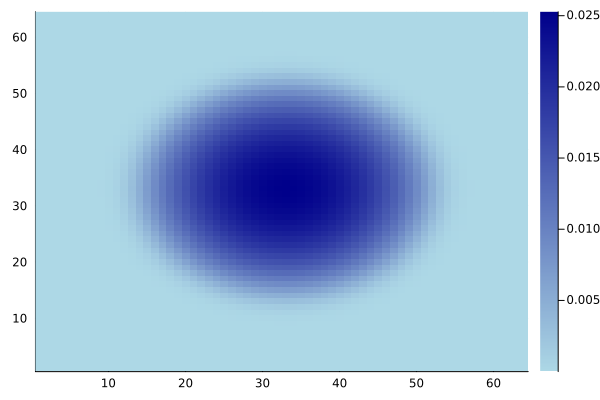

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)